In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
file_path = r"C:\Users\jiao_\Desktop\marketing_campaign.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

In [4]:
#First, look through the dataset
df.shape

(2240, 29)

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [7]:
#Z_CostContact and Z_Revenue columns have only one unique value 
#so we will get no insights from them
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [8]:
df.columns=df.columns.str.strip()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
#change the wrong format of Dt_Customer 
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

<Axes: xlabel='Marital_Status', ylabel='count'>

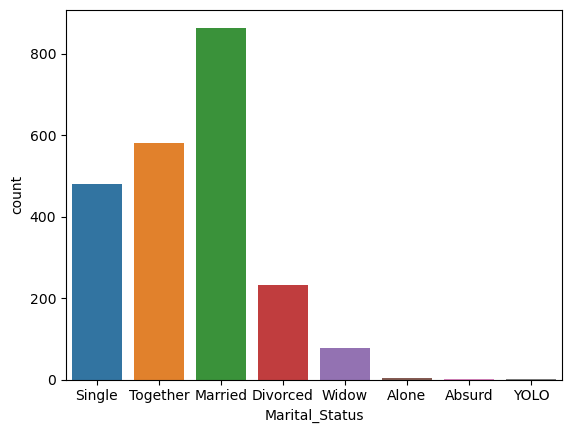

In [11]:
#check values in marital_status
sns.countplot(data=df,x=df['Marital_Status'])

In [12]:
#Data manipulation about Marital_status
#Alone is same as single, YOLO and Aburd have no meaning
filt = df['Marital_Status']=='Alone'
df.loc[filt,'Marital_Status']='Single'

In [13]:
filt = (df['Marital_Status']=='Absurd') | (df['Marital_Status']=='YOLO')
df_drop=df.loc[filt]
df_drop.index

Index([2093, 2134, 2177, 2202], dtype='int64')

In [14]:
df.drop(index=df_drop.index,inplace = True)

In [15]:
#check the Income column for missing value
df['Income'].isna().sum()

24

In [16]:
import matplotlib.pyplot as plt

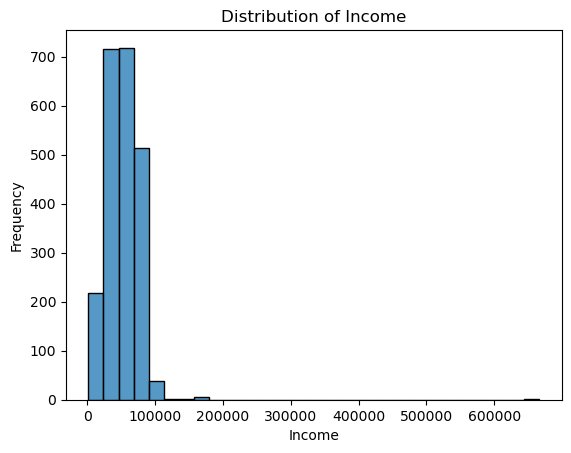

In [17]:
#check the distribution of Income
sns.histplot(data=df, x='Income', bins=30)  # Adjust the number of bins as needed
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [18]:
#use mean value to fill missing value in Income
income_edu = df.groupby('Education')['Income'].mean().to_dict()
df['Income']=df['Income'].fillna(df['Education'].map(income_edu))

In [19]:
df.reset_index() #reseting index to just make it easy to iterate throw

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2232,2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2233,2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2234,2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [20]:
#Converting the 5 columns of campagins to one column
lis = []
for i in range(df.shape[0]):
    if df.iloc[i,20]==1:
        lis.append(3)
    elif df.iloc[i,24]==1:
        lis.append(2)
    elif df.iloc[i,23]==1:
        lis.append(1)
    elif df.iloc[i,21]==1:
        lis.append(4)
    elif df.iloc[i,22]==1:
        lis.append(5)
    else :
        lis.append(0)

In [21]:
df['AcceptedCmp']=lis

In [22]:
df.drop(columns = ['AcceptedCmp1','AcceptedCmp2',
                   'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],inplace= True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,AcceptedCmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0


In [23]:
#To easy analysis the Year_Birth column i converted it to age column
df['Age']=2023-df['Year_Birth']

In [24]:
df.drop(columns = 'Year_Birth',inplace= True)

Describtive Analysis

<Axes: xlabel='Age', ylabel='Count'>

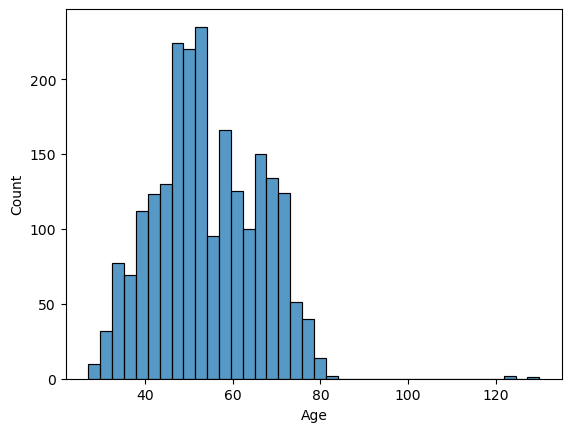

In [25]:
#show the distribution of Age
sns.histplot(data=df,x=df['Age'])

In [26]:
#discover some outliers in the age column, then I drop it
filt = (df['Age']==130) |(df['Age']==123) |(df['Age']==124) 
dropped=df.loc[filt]
df.drop(index=dropped.index,inplace=True)

In [27]:
df['Age'].describe()

count    2233.000000
mean       54.107479
std        11.697927
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: Age, dtype: float64

In [28]:
#add some categories related to age to segment our audiance
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
maxx= df['Age'].max()
minn=df['Age'].min()
print(q1)
print(q3)
print(minn)
print(maxx)

46.0
64.0
27
83


In [29]:
labels = ['27-46','47-64','65+']
ranges=[0,46,64,83]
df['Age_Cate']=pd.cut(df['Age'],bins=ranges,labels=labels)

<Axes: xlabel='Age_Cate', ylabel='count'>

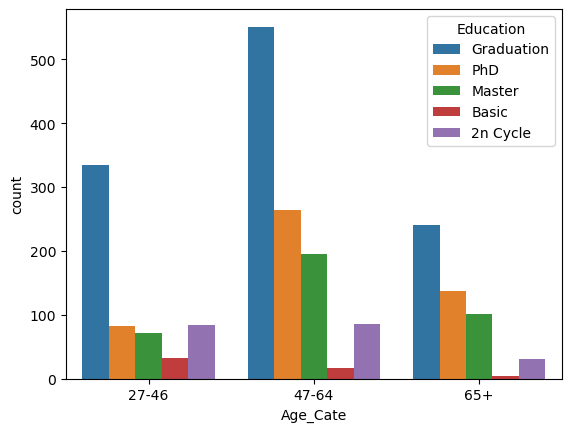

In [30]:
#check for the most frequented categories buying from age and their education
sns.countplot(data=df,x=df['Age_Cate'],hue=df['Education'])

<Axes: xlabel='Age_Cate', ylabel='count'>

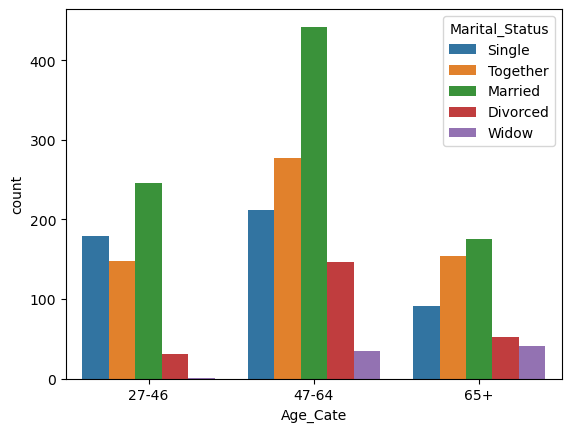

In [31]:
#check for the status that most frequented in our clients
sns.countplot(data= df,x=df['Age_Cate'],hue =df['Marital_Status'])

In [32]:
#check for the best selling product
products = ['Wines','Fruits','Meat','Fish','Sweet','Gold']
#iterate throw the columns and bring the sum of the values 
values = [df[col].sum() for col in df.columns[8:14]]

<Axes: >

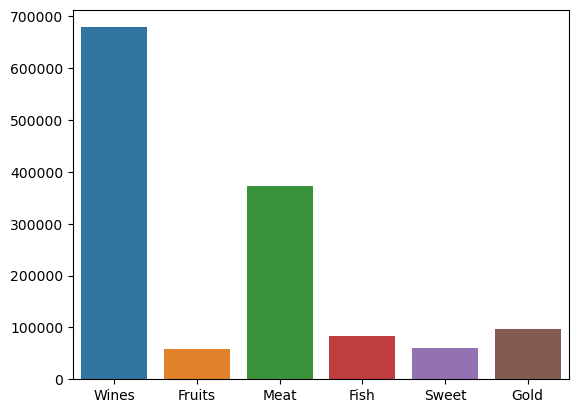

In [33]:
sns.barplot(x=products,y=values)

<Axes: xlabel='AcceptedCmp'>

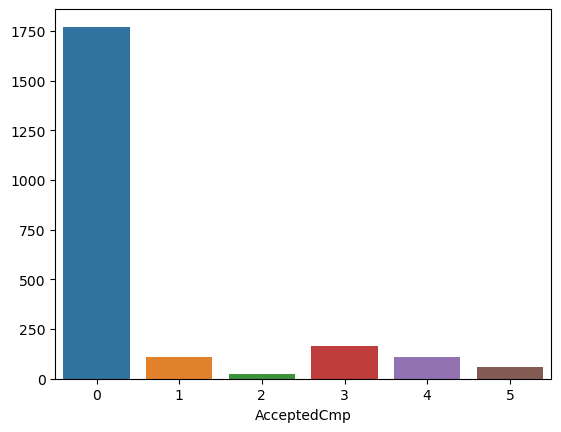

In [34]:
#check out the successful campaign from the five
values=df['AcceptedCmp'].value_counts().values
camp =df['AcceptedCmp'].value_counts().index
sns.barplot(x=camp,y=values)

<Axes: xlabel='AcceptedCmp'>

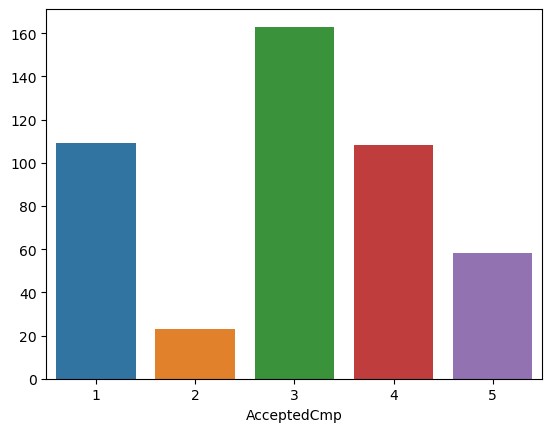

In [35]:
#deeply see the successful one
sns.barplot(x=camp[1:],y=values[1:])

<Axes: xlabel='Income', ylabel='Count'>

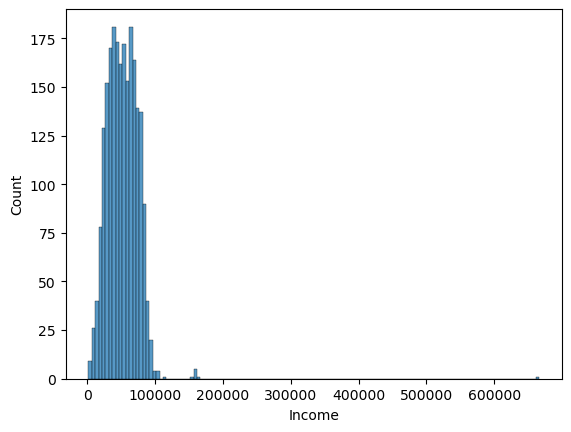

In [36]:
#about income
sns.histplot(data=df,x=df['Income'])

<Axes: >

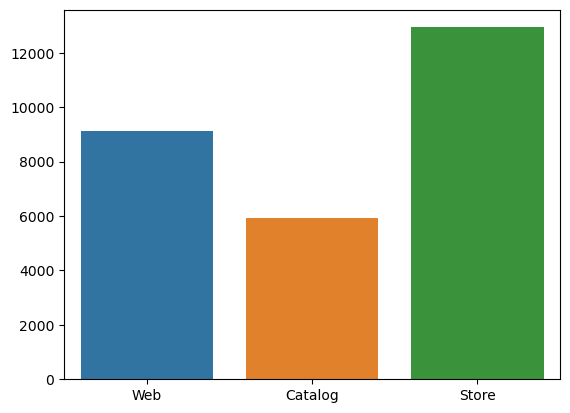

In [37]:
#about the best place to get money
places =['Web','Catalog','Store']
values =[df[col].sum() for col in df.columns[-9:-6]] #summing values in the columns of the places
sns.barplot(x=places,y=values)

Diagnostic Analytics

In [38]:
#Lets see if there is a relationship 
#between number of children or teenagers in home and buying the products
df2 =df.iloc[:,4:14]

<Axes: >

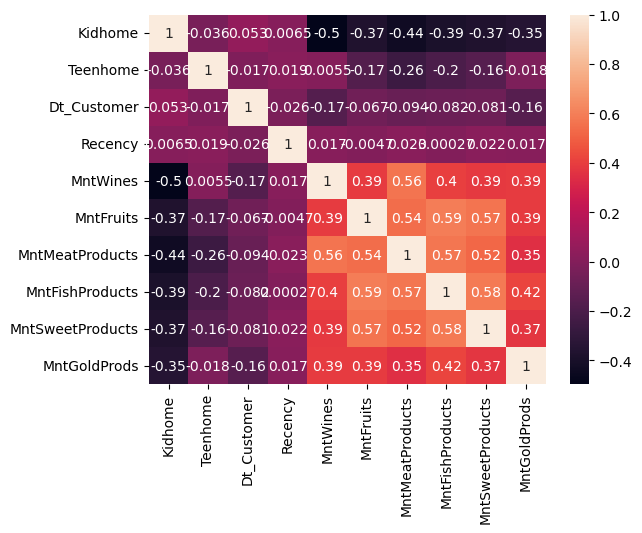

In [39]:
sns.heatmap(df2.corr(),annot=True)

In [40]:
#lets see if there is a correlation between the Marital_Status and the products
def plotting (product):
    new = df.groupby('Marital_Status')[product].sum().to_dict()
    xcol= new.keys()
    ycol=new.values()
    
    sns.barplot(x=list(xcol),y=list(ycol)) 

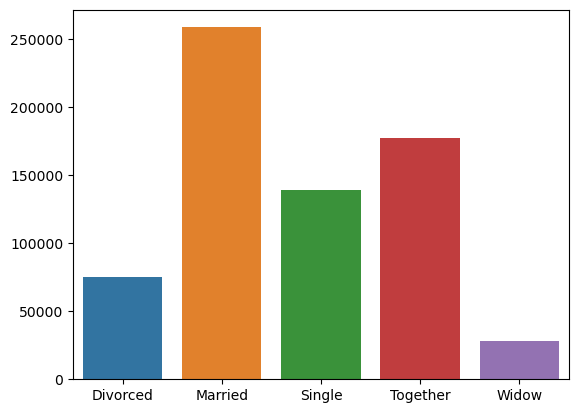

In [41]:
plotting('MntWines')

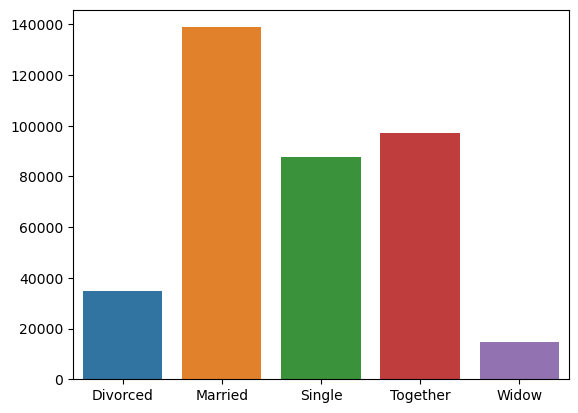

In [42]:
plotting('MntMeatProducts')

here single entered the competition in the meat product

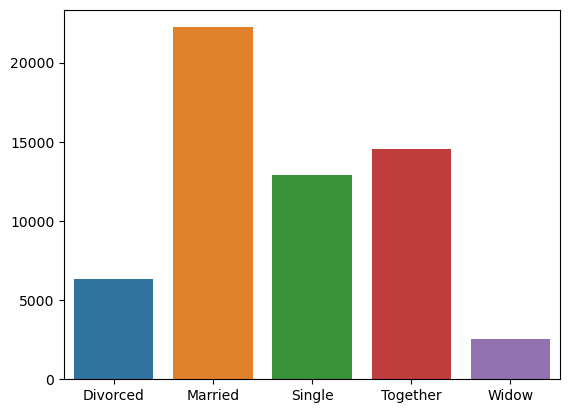

In [43]:
plotting('MntFruits')

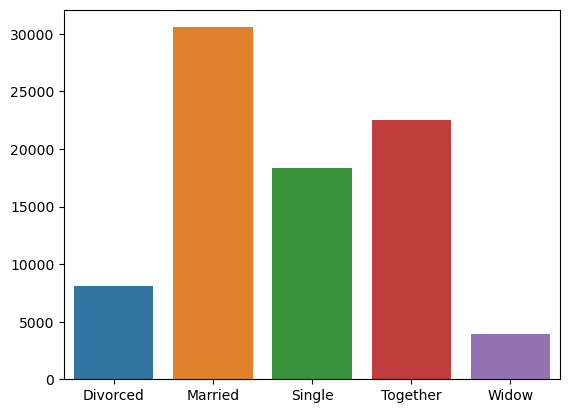

In [44]:
plotting('MntFishProducts')

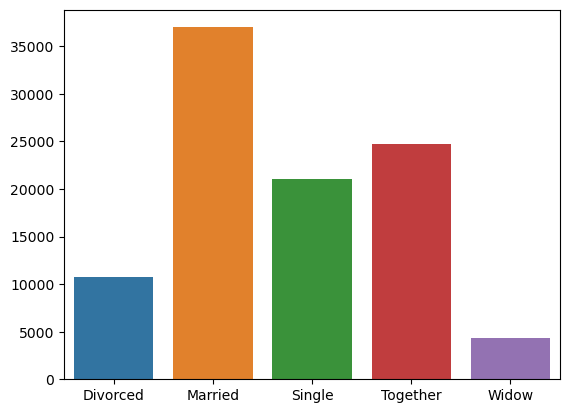

In [45]:
plotting('MntGoldProds')

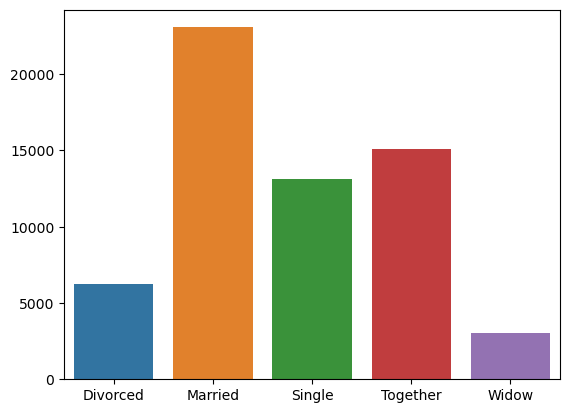

In [46]:
plotting('MntSweetProducts')

RFM Segmentation

In [47]:
# calculate Frequency
df['Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + \
                        df['NumStorePurchases'] 

In [48]:
# Create a column for monetary value
df['Monetary'] = df['MntFishProducts'] + df['MntMeatProducts'] + \
                        df['MntFruits']  + df['MntSweetProducts'] + df['MntWines'] + \
                        df['MntGoldProds']

In [49]:
import pandas as pd

# Calculate the quantiles of Recency, Frequency and Monetary and assign corresponding labels
df['RecencyScore'] = pd.qcut(df['Recency'], q=4, labels=[4, 3, 2, 1])
df['FrequencyScore'] = pd.qcut(df['Frequency'], q=4, labels=[1, 2, 3, 4])
df['MonetaryScore'] = pd.qcut(df['Monetary'], q=4, labels=[1, 2, 3, 4])

In [50]:
df['RFM_Score'] = df['RecencyScore'].astype(str) + df['FrequencyScore'].astype(str) + df['MonetaryScore'].astype(str)

In [51]:
recency_threshold = df['Recency'].quantile(0.25)  # Set the first quartile of Recency as the threshold
frequency_threshold = df['Frequency'].quantile(0.75)  # Set the third quartile of Frequency as the threshold
monetary_threshold = df['Monetary'].quantile(0.75)  # Set the third quartile of Monetary as the threshold

In [52]:
#Group users based on thresholds
def customer_segmentation(row):
    if row['Recency'] <= recency_threshold and row['Frequency'] >= frequency_threshold and row['Monetary'] >= monetary_threshold:
        return 'Top'
    elif row['Recency'] > recency_threshold and row['Frequency'] >= frequency_threshold and row['Monetary'] >= monetary_threshold:
        return 'Loyal'
    elif row['Recency'] <= recency_threshold and row['Frequency'] < frequency_threshold and row['Monetary'] < monetary_threshold:
        return 'At-Risk'
    else:
        return 'Immediate Attention'

In [53]:
# Apply function and create new column to display customer groupings
df['Customer_Group'] = df.apply(customer_segmentation, axis=1)

In [54]:
# View Results
print(df[['Recency', 'Frequency', 'Monetary', 'Customer_Group']].head(10))  

   Recency  Frequency  Monetary       Customer_Group
0       58         22      1617                Loyal
1       38          4        27  Immediate Attention
2       26         20       776  Immediate Attention
3       26          6        53  Immediate Attention
4       94         14       422  Immediate Attention
5       16         20       716  Immediate Attention
6       34         17       590  Immediate Attention
7       32          8       169  Immediate Attention
8       19          5        46              At-Risk
9       68          1        49  Immediate Attention


<Axes: xlabel='Customer_Group', ylabel='Count'>

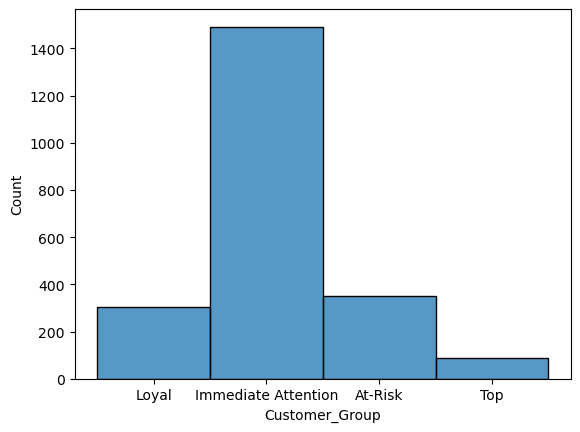

In [55]:
#about Customer_Group
sns.histplot(data=df,x=df['Customer_Group'])

In [56]:
# 查看Customer_Group列中每个值的占比
group_counts = df['Customer_Group'].value_counts(normalize=True)

# 打印占比结果
print(group_counts)

Customer_Group
Immediate Attention    0.668159
At-Risk                0.156740
Loyal                  0.136140
Top                    0.038961
Name: proportion, dtype: float64


In [58]:
import pandas as pd
pivot_avg = pd.pivot_table(df, values=['Age', 'Income', 'Kidhome'], 
                           index='Customer_Group', aggfunc='mean')
print(pivot_avg)

                           Age        Income   Kidhome
Customer_Group                                        
At-Risk              52.857143  41218.254700  0.622857
Immediate Attention  54.199062  48781.005959  0.506702
Loyal                54.825658  74564.321014  0.059211
Top                  55.057471  77593.344828  0.022989


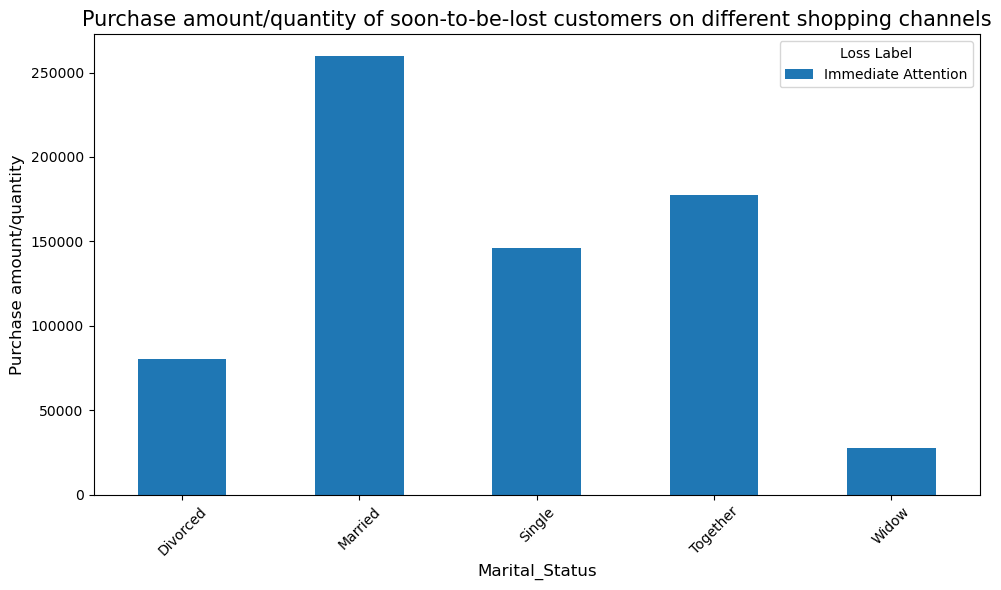

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume your data frame is named df and contains customer ID, churn label and shopping channel columns
# Create a pivot table to calculate the purchase quantity or amount of different lost customer groups on different shopping channels
pivot_table = pd.pivot_table(df[df['Customer_Group'] == 'Immediate Attention'],
                              values='Monetary',
                              index='Marital_Status',
                              columns='Customer_Group',
                              aggfunc='sum')

# Draw a histogram
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Purchase amount/quantity of soon-to-be-lost customers on different shopping channels', fontsize=15)
plt.xlabel('Marital_Status', fontsize=12)
plt.ylabel('Purchase amount/quantity', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Loss Label')
plt.tight_layout()
plt.show()

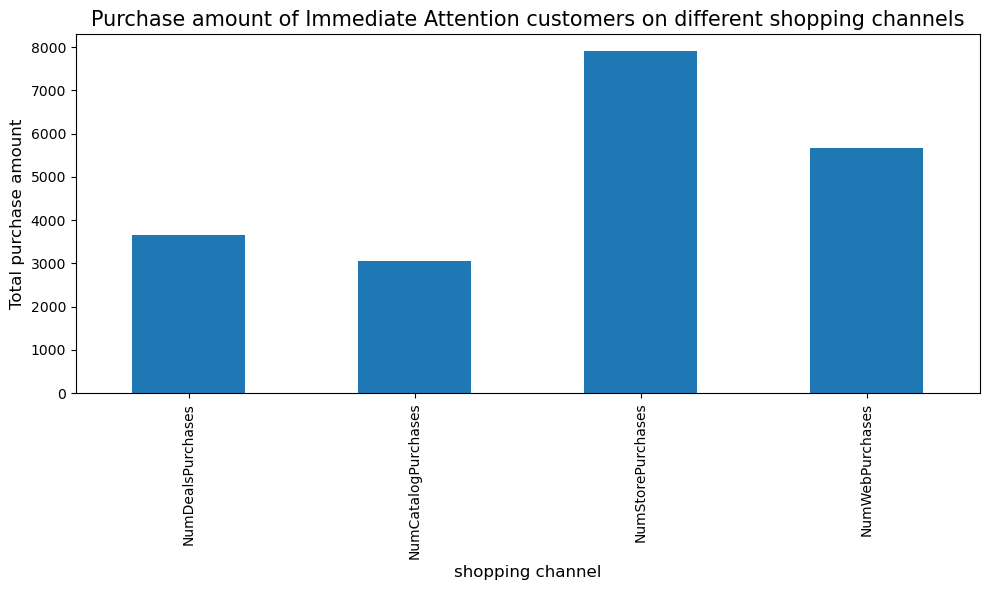

In [61]:
import matplotlib.pyplot as plt

# Select a subset of specific Customer_Group values
subset = df[df['Customer_Group'] == 'Immediate Attention']

# Calculate the sum of purchase quantities on different shopping channels
total_purchases = subset[['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].sum()

# Draw stacked column chart
plt.figure(figsize=(10, 6))
total_purchases.plot(kind='bar', stacked=True)
plt.title('Purchase amount of Immediate Attention customers on different shopping channels', fontsize=15)
plt.xlabel('shopping channel', fontsize=12)
plt.ylabel('Total purchase amount', fontsize=12)
plt.tight_layout()
plt.show()

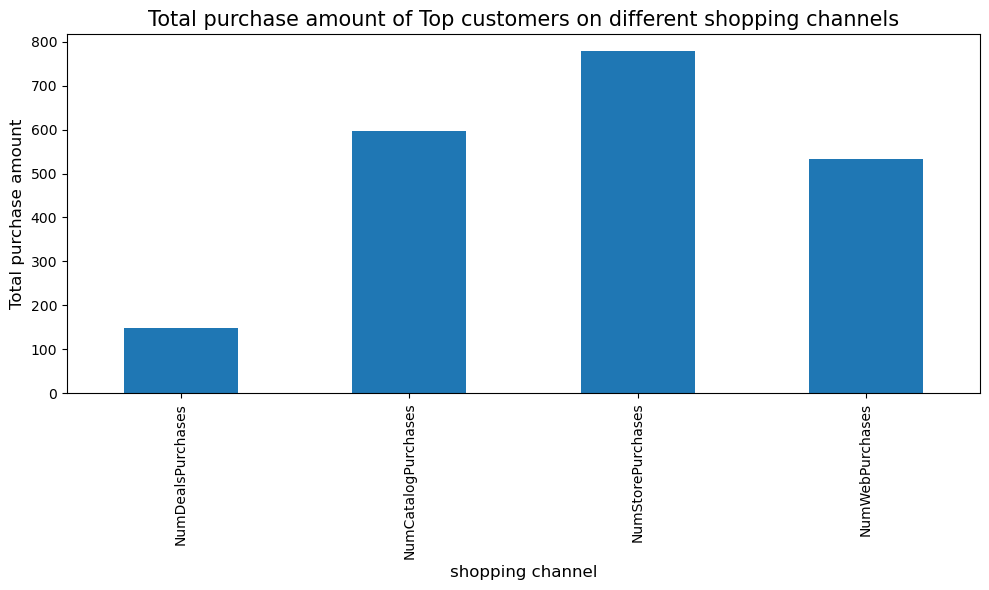

In [62]:
import matplotlib.pyplot as plt

# Select a subset of specific Customer_Group values
subset = df[df['Customer_Group'] == 'Top']

# Calculate the sum of purchase quantities on different shopping channels
total_purchases = subset[['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].sum()

# Draw stacked column chart
plt.figure(figsize=(10, 6))
total_purchases.plot(kind='bar', stacked=True)
plt.title('Total purchase amount of Top customers on different shopping channels', fontsize=15)
plt.xlabel('shopping channel', fontsize=12)
plt.ylabel('Total purchase amount', fontsize=12)
plt.tight_layout()
plt.show()